Shibu Mohapatra

Artificial Intelligence

**Multiple linear regression and diagnostic measures using neural Network procedure to predict data. Compare how neural network is better over ordinary least square estimates.**

##### **A. Multiple linear regression and diagnostic measures using neural Network procedure to predict data**

In [16]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

#Dataset
TRAIN_DATA_PATH = '/content/sample_data/california_housing_train.csv'
TEST_DATA_PATH = '/content/sample_data/california_housing_test.csv'
TARGET_NAME = 'median_house_value'

In [17]:
# x_train = features, y_train = target
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

In [18]:
def scale_datasets(x_train, x_test):

  # Standard Scale test and train data
  # Z - Score normalization

  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train),columns=x_train.columns)
  x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test),columns = x_test.columns)
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [19]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [20]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(loss=msle, optimizer=Adam(learning_rate=learning_rate), metrics=[msle])

# train the model
history = model.fit(x_train_scaled.values, y_train.values, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
213/213 [==============================] - 3s 9ms/step - loss: 5.1650 - mean_squared_logarithmic_error: 5.1536 - val_loss: 0.6676 - val_mean_squared_logarithmic_error: 0.6633
Epoch 2/10
213/213 [==============================] - 2s 7ms/step - loss: 0.2706 - mean_squared_logarithmic_error: 0.2704 - val_loss: 0.3791 - val_mean_squared_logarithmic_error: 0.3843
Epoch 3/10
213/213 [==============================] - 2s 7ms/step - loss: 0.2046 - mean_squared_logarithmic_error: 0.2045 - val_loss: 0.2907 - val_mean_squared_logarithmic_error: 0.2988
Epoch 4/10
213/213 [==============================] - 2s 7ms/step - loss: 0.1626 - mean_squared_logarithmic_error: 0.1625 - val_loss: 0.2252 - val_mean_squared_logarithmic_error: 0.2336
Epoch 5/10
213/213 [==============================] - 2s 7ms/step - loss: 0.1343 - mean_squared_logarithmic_error: 0.1342 - val_loss: 0.1648 - val_mean_squared_logarithmic_error: 0.1724
Epoch 6/10
213/213 [==============================] - 2s 7ms/step - lo

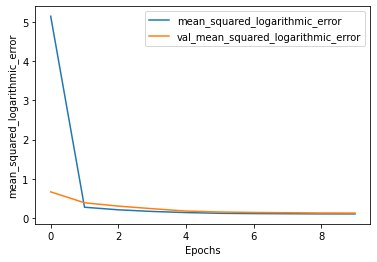

In [21]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [22]:
x_test['prediction'] = model.predict(x_test_scaled)
x_test.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,prediction
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,343966.093750
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,188352.859375
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,261868.187500
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,326603.593750
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,92568.203125


##### **B. Comparing how neural network is better over ordinary least square estimates.**

In [23]:
# load numpy and pandas for data manipulation
import numpy as np
import pandas as pd
import statsmodels.api as sm
# load the longley dataset into a pandas data frame - first column (year) used as row labels
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0) 
df.head(3)

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171


In [24]:
y = df.Employed  # response
X = df.GNP  # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head(3)

,const,GNP
1947,1.0,234.289
1948,1.0,259.426
1949,1.0,258.054


In [25]:
est=sm.OLS(y, X)
est = est.fit()
est.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           8.36e-12
Time:                        13:39:36   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
est.params

const    51.843590
GNP       0.034752
dtype: float64

Populating the interactive namespace from numpy and matplotlib


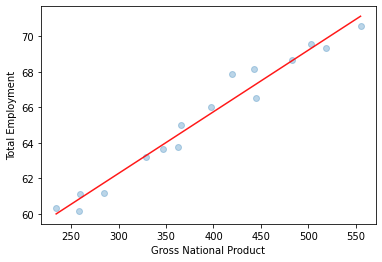

In [27]:
# Make sure that graphics appear inline in the iPython notebook 
%pylab inline 

# We pick 100 hundred points equally spaced from the min to the max 
X_prime = np.linspace(X.GNP.min(), X.GNP.max(), 100)[:, np.newaxis] 
X_prime = sm.add_constant(X_prime) 

# add constant as we did before 
# Now we calculate the predicted values 
y_hat = est.predict(X_prime) 
plt.scatter(X.GNP, y, alpha=0.3) 

# Plot the raw data 
plt.xlabel("Gross National Product") 
plt.ylabel("Total Employment") 
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9) 

# Add the regression line, colored in red Populating the interactive namespace from numpy and matplotlib

In [28]:
# import formula api as alias smf 
import statsmodels.formula.api as smf 

# formula: response ~ predictors 
est = smf.ols(formula='Employed ~ GNP', data=df).fit() 
est.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           8.36e-12
Time:                        13:39:36   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

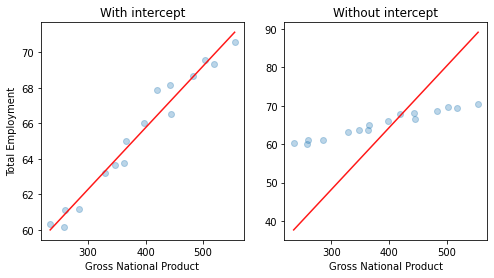

In [29]:
# Fit the no-intercept model 
est_no_int = smf.ols(formula='Employed ~ GNP - 1', data=df).fit() 

# We pick 100 hundred points equally spaced from the min to the max 
X_prime_1 = pd.DataFrame({'GNP': np.linspace(X.GNP.min(), X.GNP.max(), 100)}) 
X_prime_1 = sm.add_constant(X_prime_1) 

# add constant as we did before 
y_hat_int = est.predict(X_prime_1) 
y_hat_no_int = est_no_int.predict(X_prime_1) 
fig = plt.figure(figsize=(8,4)) 
splt = plt.subplot(121) 
splt.scatter(X.GNP, y, alpha=0.3) # Plot the raw data plt.ylim(30, 100) 

# Set the y-axis to be the same 
plt.xlabel("Gross National Product") 
plt.ylabel("Total Employment") 
plt.title("With intercept") 
splt.plot(X_prime[:, 1], y_hat_int, 'r', alpha=0.9) # Add the regression line, colored in red 
splt = plt.subplot(122) 
splt.scatter(X.GNP, y, alpha=0.3) 

# Plot the raw data 
plt.xlabel("Gross National Product") 
plt.title("Without intercept") 
splt.plot(X_prime[:, 1], y_hat_no_int, 'r', alpha=0.9) # Add the regression line, colored in red